## Prerequisite

This section is used to import packages to load data/files for the contents of this report

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = {}
data['train'] = np.load('../data/data_for_training.npz')
data['test'] = np.load('../data/test_data.npz')

best_model = '20210717154623'
metrics_df = pd.read_csv(f'../result/accuracies/{best_model}_merged_metrics_df.csv')

## Introduction

#### 1. Problem Statement

#### 2. Data Distribution

The train set consists of 22,661 spectrograms (731 samples per intent)  
The test set consists of 4,774 spectrograms (154 samples per intent)

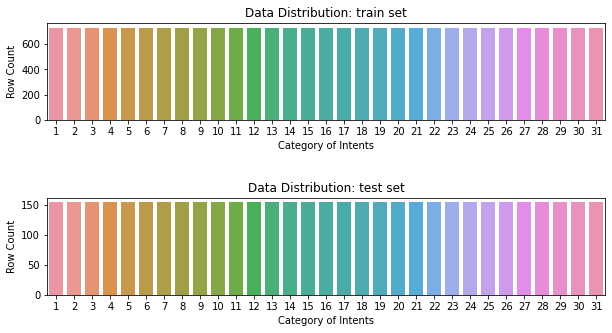

In [136]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.8)
for i, key in enumerate(data.keys()):
    unique, counts = np.unique(data[key]['f1'], return_counts=True)
    sns.barplot(x=unique, y=counts, ax=axes[i])
    axes[i].set_title(f'Data Distribution: {key} set')
    axes[i].set_xlabel('Category of Intents')
    axes[i].set_ylabel('Row Count')

## Model Architecture 

#### 1. Architecture

#### 2. Model Size

# Training

### 1. Train-Validation Split

The training data was first **randomly splitted** into train set and validation set in order to support early stopping mechanism to avoids overfitting. **20%** of the training data is hold out as validation set with **stratified sampling**.

### 2. Epoch, Iteration, Batch Size, Learning Rate & Loss Function

Since this is a multiclass classification problem, the **cross-entropy loss** is used as the loss function. The model is trained with **200 epochs, 32 iterations, 1024 batch size and 0.01 learning rate**. Instead of going through the whole training set, each epoch will sample 32 batch of data from the training set with 1024 samples per batch by sampling with replacement.

### 3. Early Stopping

An early stopping mechanism is applied to avoid overfitting. After each epoch, the validation set is inferenced and the validation loss is recorded. **The training will be early stopped if the validation loss does not improve after 20 epochs**. Then, the model parameters right after the epoch with lowest validation loss will be used as the final model for evaluation on test set.

### 4. Data Augmentation

In order to increase robustness of the model and reduce overfitting, data augmentation strategy is applied during training. Each mini-batch of training data will first be augmented by both **time masking** and **frequency masking**. For time masking, **10% out of the 300 timestamps** per spectrogram are masked. For frequency masking, **10% out of 41 features** per spectrogram are masked. The masking value is the mean value of the spectrograms per mini-batch.

## Results

#### 1. Accuracy, Precision & Recall

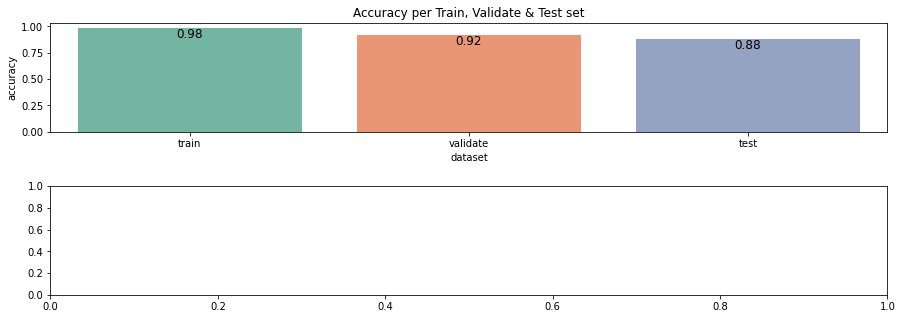

In [244]:
# Figure setting
fig, axes = plt.subplots(nrows=2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)

# Accuracy bar plot
axes[0].set_title('Accuracy per Train, Validate & Test set')
ac_plot = sns.barplot(data=metrics_df[metrics_df.category=='overall'],
                      x="dataset", y="accuracy", ax=axes[0], orient='v', palette='Set2')
cols_order = ['train', 'validate', 'test']
grouped_df = metrics_df[metrics_df.category=='overall'].groupby('dataset')['accuracy'].sum().reindex(cols_order)
for index, row in grouped_df.reset_index().iterrows():
    ac_plot.text(index, row.accuracy, round(row.accuracy,2), color='black', ha='center', va="top", fontsize=12)
    
# Precision an
# sns.catplot(data=metrics_df, x="category", y="recall", row="dataset", kind="bar", orient='v', aspect=5, height=3, ax=axes[1])

In [187]:
cols_order = ['train', 'validate', 'test']
grouped_df = metrics_df[metrics_df.category=='overall'].groupby('dataset')['accuracy'].sum().reindex(cols_order)
grouped_df

dataset
train       0.982458
validate    0.916612
test        0.877042
Name: accuracy, dtype: float64

In [170]:
# # metrics_df.pivot(index='category', columns='dataset', values='accuracy')
# metrics_df[metrics_df.category=='overall'].pivot(index='category', columns='dataset', values='accuracy')

for index, row in metrics_df[metrics_df.category=='overall'].groupby('dataset')['accuracy'].sum().reset_index().iterrows():
    print(row.dataset)

test
train
validate


In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.8)
for i, key in enumerate(data.keys()):
    unique, counts = np.unique(data[key]['f1'], return_counts=True)
    sns.barplot(x=unique, y=counts, ax=axes[i])
    axes[i].set_title(f'Data Distribution: {key} set')
    axes[i].set_xlabel('Category of Intents')
    axes[i].set_ylabel('Row Count')

#### 2. Confusion Matrix

## Discussion

In [ ]:
"Compare high error terms"

## Conclusion